# Task

Create a convolutional neural network to process the MNIST dataset.

Compare it with a neural network with fully connected layers.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load and display data

In [72]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Reminder that values take on shades of grey 0 - 255
* 0 is black
* 255 is white

In [73]:
img = X_train[0]
print (f"min:{np.amin(X_train[0])} max:{np.amax(X_train[0])}")

min:0 max:255


In [74]:
def show_images (images, labels, rows=6, cols=10):
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for idx in range (0, rows * cols):
        ridx=idx // cols
        cidx=idx % cols
        ax= axes[ridx, cidx]
        ax.axis("off")
        ax.imshow(images[idx], cmap="gray_r")
        ax.set_title(f"{labels[idx]}")
    plt.show()    

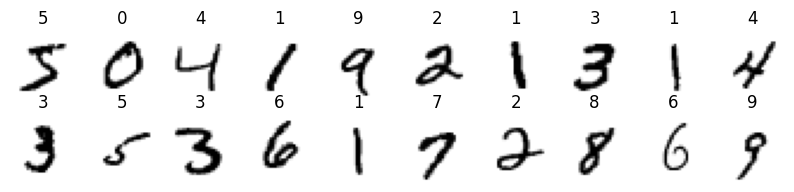

In [75]:
show_images(X_train, Y_train, 2, 10)

# Data preparation

Standardization of values from range 0 - 255 to range 0 - 1

In [76]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train_dense = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test_dense  = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

Binary encoding

In [77]:
from keras.utils import to_categorical 
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# Neural network

In [78]:
import keras
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from keras.models import Sequential

In [79]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# Creating and learning the model

In [82]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
start_time = time.time()
history = model.fit(X_train_cnn, Y_train, epochs=15, batch_size=128, validation_split=0.1,callbacks=[early_stop])
training_time = time.time() - start_time




Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7762 - loss: 0.6932 - val_accuracy: 0.9802 - val_loss: 0.0691
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9590 - loss: 0.1351 - val_accuracy: 0.9865 - val_loss: 0.0467
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9717 - loss: 0.0929 - val_accuracy: 0.9892 - val_loss: 0.0412
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9749 - loss: 0.0833 - val_accuracy: 0.9877 - val_loss: 0.0418
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9790 - loss: 0.0680 - val_accuracy: 0.9897 - val_loss: 0.0323
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9813 - loss: 0.0606 - val_accuracy: 0.9908 - val_loss: 0.0327
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9839 - loss: 0.0533 - val_accuracy: 0.9912 - val_loss: 0.0299
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9844 - loss: 0.0493 - val_accu

In [83]:
model.save('model_mnist.keras')

# History of learning model
- Show learning curve
- Show model accuracy curve
- Describe the shapes

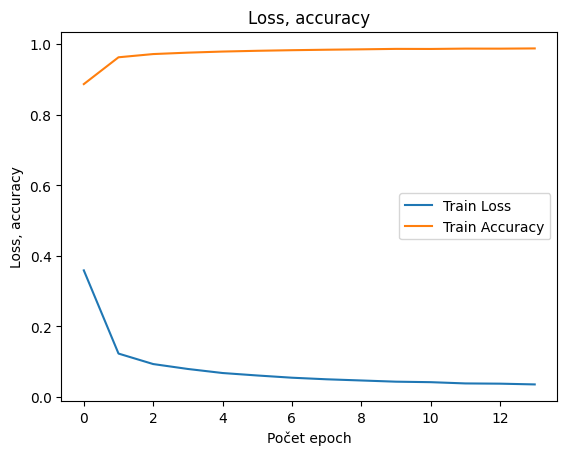

In [84]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend(loc="right")
plt.title('Loss, accuracy')
plt.ylabel('Loss, accuracy')
plt.xlabel('Počet epoch')
plt.show()

# Model Verification
- R2 score
- Accuracy of the model as a whole
- Accuracy across classes
- Change matrix
- Examples of misclassification

In [85]:
Y_pred = model.predict(X_test_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [86]:
Y_pred[0]

array([7.25377603e-14, 4.31831827e-11, 1.76081694e-09, 4.05599154e-09,
       6.79280173e-14, 3.01460658e-12, 5.92986032e-19, 9.99999881e-01,
       1.36961735e-11, 9.28339432e-08], dtype=float32)

In [87]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [88]:
Y_pred_best_answer = np.argmax(Y_pred, axis=-1)
Y_pred_best_answer

array([7, 2, 1, ..., 4, 5, 6])

In [89]:
Y_test_best_answer=np.argmax(Y_test, axis=-1)
Y_test_best_answer

array([7, 2, 1, ..., 4, 5, 6])

In [90]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test_best_answer, Y_pred_best_answer)
print('R2 score: {}'.format(r2))

R2 score: 0.9806683121665781


In [91]:
scores = model.evaluate(X_test_cnn, Y_test, verbose=0)
print (f"Loss function (categorical_crossentropy): {scores[0]}")
print (f"Accuracy: {scores[1]}")

Loss function (categorical_crossentropy): 0.022359007969498634
Accuracy: 0.9922000169754028


<Axes: >

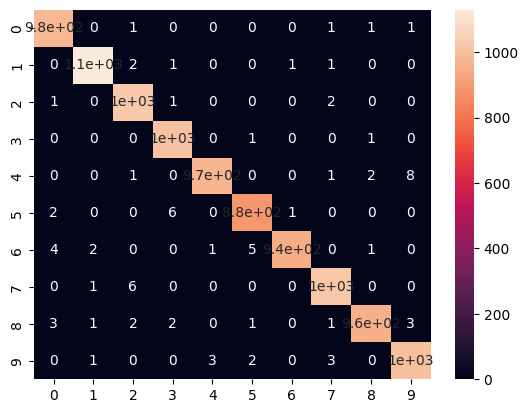

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf_matrix=confusion_matrix(Y_test_best_answer, Y_pred_best_answer)
sns.heatmap(cf_matrix, annot=True)

# Model Comparison
- Which model is more accurate
- How about the learning time
- How about the time of inference

In [93]:
Dense = keras.models.load_model('../10_ANN_classification/classification_model_mnist.keras')

start = time.time()
_ = model.predict(X_test_cnn, verbose=0)
inference_cnn = time.time() - start

start = time.time()
_ = Dense.predict(X_test_dense, verbose=0)
inference_dense = time.time() - start


print(f"Training time CNN: {training_time:.4f} seconds")
print("As we saw in the topic number 10 the training time for Dense model is 1 min 18 seconds")
print(f"Inference time CNN: {inference_cnn:.4f} seconds")
print(f"Inference time Dense: {inference_dense:.4f} seconds") 
print (f"Accuracy of CNN: {scores[1]}")  
print (f"Accuracy of Dense according to topic 10: 0.9779999852180481")     




Training time CNN: 70.7005 seconds
As we saw in the topic number 10 the training time for Dense model is 1 min 18 seconds
Inference time CNN: 0.6389 seconds
Inference time Dense: 0.3553 seconds
Accuracy of CNN: 0.9922000169754028
Accuracy of Dense according to topic 10: 0.9779999852180481
